In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Implement me
# Set working directory
directory = '/content/drive/My Drive/Colab Notebooks/NLP_The-2020-Presidential-Race-master/Data/All_Candidates/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [5]:
pip install textacy

     |████████████████████████████████| 215kB 3.2MB/s 
     |████████████████████████████████| 481kB 10.1MB/s 
     |████████████████████████████████| 3.0MB 16.4MB/s 
     |████████████████████████████████| 143kB 46.0MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp36-cp36m-linux_x86_64.whl size=1257670 sha256=337268bc5fddd6dda66b7c5886e382d1db13c2dba6a3430046f9989c318cb6d1
  Stored in directory: /root/.cache/pip/wheels/64/2a/18/d962b614e055577e7d9a3e4813e0742f822ca9c8800cc3783a
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp36-cp36m-linux_x86_64.whl size=73004 sha256=439e8368c69492426a3eaabe5fdf360394517a34cbeed4cd4a5bdd80c9ee022a
  Stored in directory: /root/.cache/pip/wheels/e8/fe/99/d8fa8f2ef7b82a625b0b77a84d319b0b50693659823c4effb4
Successfully built cytoolz jellyfish


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import spacy
import textacy.extract
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import en_core_web_sm

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,12

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
stop_words = list(set(stopwords.words('english')))
more_words = ['Mr.', '--', 'highlightingFull', '-', '_', 'In', "Ms.", 'but', 'First', 'one', 'keep', "The", 'said',
              'TextTranslateUndo','Translation',  'FromToTranslateTranslation',  'progress...',  '[[missing',  'key:',  
              'loadingAnimation]]The',  'full',  'text',  'may',  'take',  '40-120',  'seconds',  'translate;',  'larger',  
              'documents',  'may',  'take',  'longer.',  'Cancel',  'OverlayEndTurn',  'search',  'term',  'navigationTurn',  
              'search',  'term',  'navigation',  '|',  'Jump',  'first',  'hitWith',  "president's", 'And', 'could', 'going',
              'get', 'FOR', 'would', 'president', 'But', 'AND', 'I', "ANY", 'AS', 'OR', 'He', "Trump's", 'also', 'use', 'make',
              '"AS', 'hide', 'two', 'want', 'way', 'even', 'last', 'said', 'said,', 'said.', 'A', 'made', 'time', 'using', 
              'Trump,', 'BY', 'ProQuest', 'licensors', 'translations', 'NEW', 'YORK', 'Times', 'New', 'York', 'think', 'This',
              'including', 'told', "The'", "Hide'", 'Mr', 'translation', "I'", "but'", "s'", "In'", "It'", "much'", "He'",
              'functionality', "'|", '*', "'I", '.', 'Washinton', 'Post', 'washpost', 'com', 'wsj', '/"', 'mr', 'm', 'a', 'mr.',
              'ms.', "new", "a", "york", "a", "proquest", "Hide", "highlighting", "Full", "Text", "Translate", "Undo", 
              "Translation", "From", "To", "TranslateTranslation", "in", "progress", "[", "missing", "key", ":",
              "loadingAnimation", "]", "may", "take", "seconds", "translate", "larger", "documents", "longer", "Cancel",
              "OverlayEndTurn", "Turn", "on", "search", "term", "navigation", "navigation", "Jump", "to", "first", "hit",
              "(", "PHOTOGRAPHS", "BY" "ASSOCIATED", "PRESS", "Word", "count", "Show", "less", "You", "have", "requested",
               "on-the-fly", "machine", "translation", "selected", "content", "from", "our", "databases", "This", 
              "functionality", "provided", "solely", "your", "convenience", "no", "way", "intended", "replace", "human",
              "Show", "disclaimer", "Neither", "ProQuest", "nor", "its", "licensors", "make", "any", "representations",
              "warranties", "with", "respect", "translations", "are", "automatically", "generated", "retained", "systems"
              "PROQUEST", "LICENSORS", "SPECIFICALLY", "DISCLAIM", "ANY", "ALL", "EXPRESS", "OR", "IMPLIED", "WARRANTIES",
              "INCLUDING", "WITHOUT", "LIMITATION", "AVAILABILITY", "ACCURACY", "TIMELINESS", "COMPLETENESS", "NON-INFRINGMENT", 
              "MERCHANTABILITY", "FITNESS", "PARTICULAR", "PURPOSE", "use", "restrictions", "contained", "Electronic",
              "Products", "License", "Agreement", "agree", "forgo", "claims", "against", "ProQuest", "output", "derived",
              "there", "from", "disclaimer", "Longer", "documents", "while", "Rather", "than", "keep", "you", "waiting", 
              "we", "have", "only", "translated", "paragraphs", "Click", "button", "below", "rest", "document", "Translate",
              "AllCopyright", "Company", "fly", 'systems', 'NON', 'part', 'lessYou', 'week', 'many', 'say', 'year', 'day',
              'INFRINGMENT', 'AVAILABLE', 'disclaimerNeither', 'back', 'whether', 'much', 'still', 'since', 'then', 'according',
              'come', 'thing', 'know', 'see', "saying", 'still', 'subject', 'PROQUEST', 'highlightingfull', 'texttranslateundo',
              'fromtotranslatetranslation', 'loadinganimationthe', 'cancel', 'overlayendturn', 'navigationturn', 'jump', 
              'hitwith', 'ad', 'like'
              ]
more_stop_words = stop_words + more_words

In [0]:
def clean_doc(target):
  file = pd.read_csv(directory + target)
  text = file.text.loc[~file.text.isnull()]
  text_str = text.str.split()
  corpus=[]
  for x in text_str:
    corpus.append(x)
  filtered_words = []
  for w in corpus:
      for v in w:
         if not v in more_stop_words:
           if v.isalpha():
             if len(v) > 5:
                 filtered_words.append(v)
  return filtered_words

In [0]:
Trump_words = clean_doc('Donald_Trump.csv')
Biden_words = clean_doc('Joe_Biden.csv')
Sanders_words = clean_doc('Bernie_Sanders.csv')

In [0]:
def counter(target):
    counter=Counter(target)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:50]:
        x.append(word)
        y.append(count)
    return(sns.barplot(x=y,y=x))

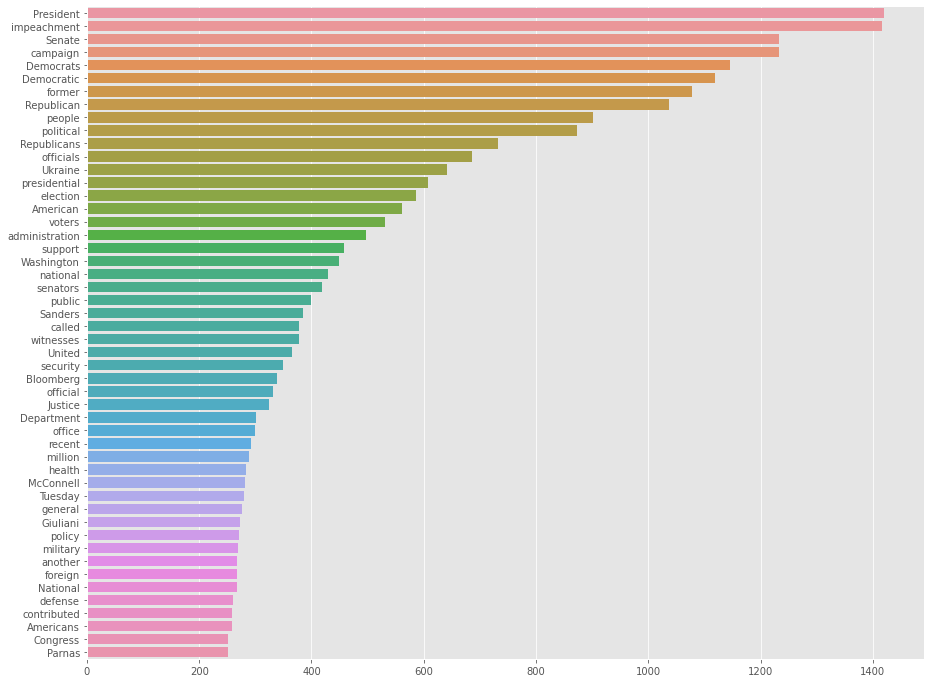

In [84]:
counter(Trump_words);

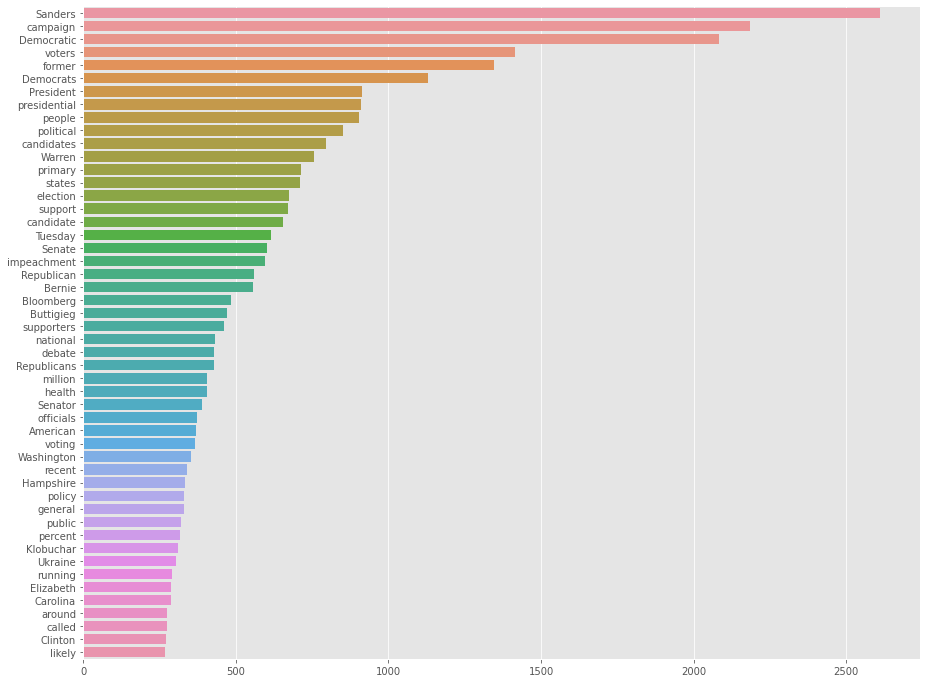

In [86]:
counter(Biden_words);

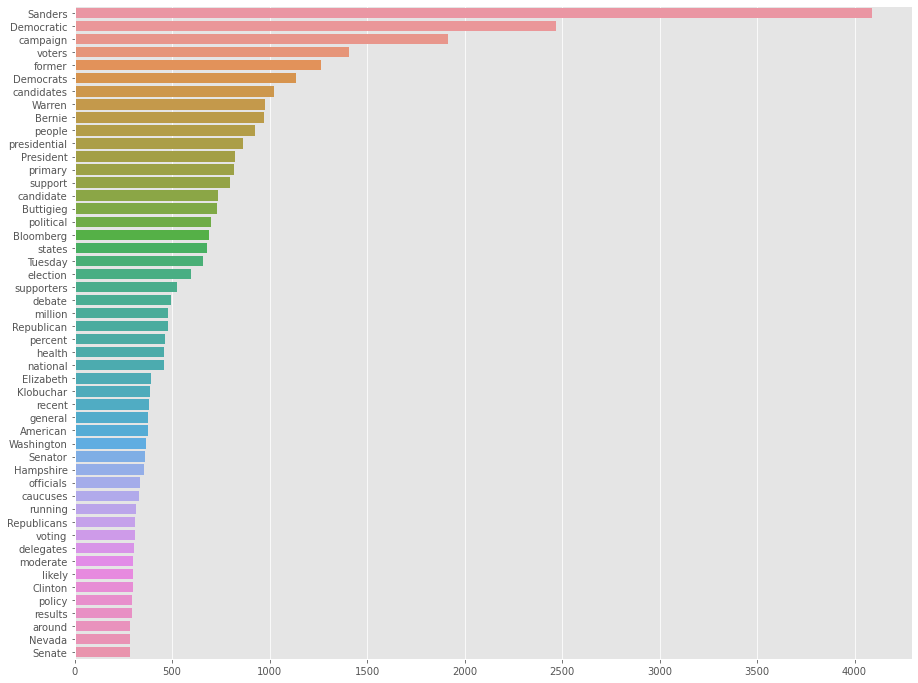

In [87]:
counter(Sanders_words);

In [0]:
def join_text(target):
  file = pd.read_csv(directory + target)
  text = file.text.loc[~file.text.isnull()]
  join = ', '.join(text)
  return join

In [0]:
Trump_join = join_text('Donald_Trump.csv')
Biden_join = join_text('Joe_Biden.csv')
Sanders_join = join_text('Bernie_Sanders.csv')

In [0]:
def wordcloud(target):
    wordcloud = WordCloud(stopwords=more_stop_words, max_font_size=50, max_words=100, background_color="white").generate(target)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

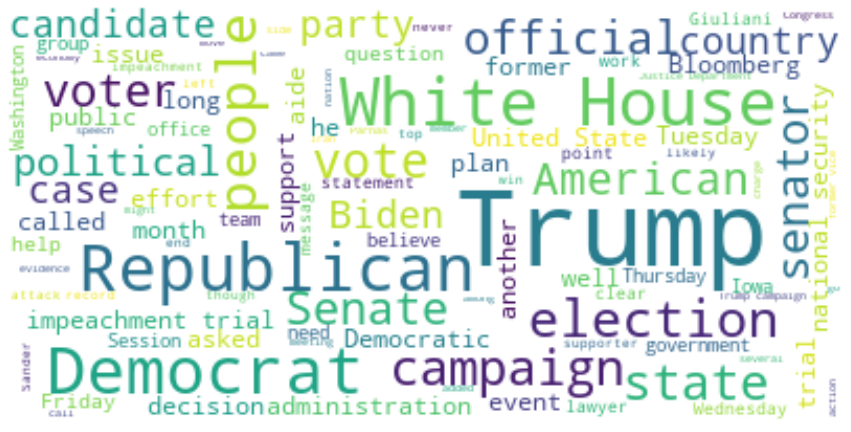

In [148]:
wordcloud(Trump_join)

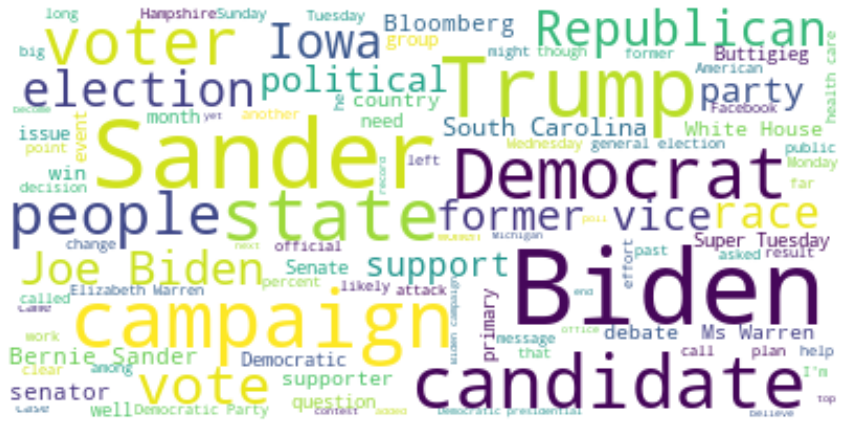

In [149]:
wordcloud(Biden_join)

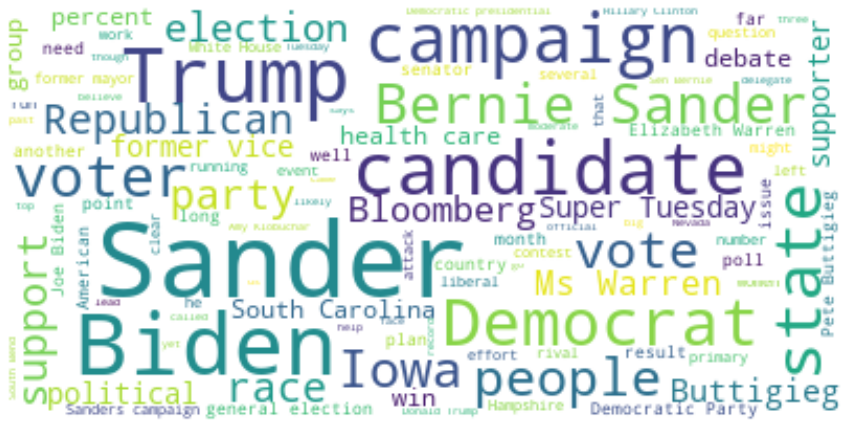

In [150]:
wordcloud(Sanders_join)

In [0]:
def extract_statements(doc, name):
   nlp = spacy.load('en_core_web_sm')
   nlp.max_length = 10300000
   doc = nlp(doc)
   statements = textacy.extract.semistructured_statements(doc, name)
   print("Here are the things learned about {name}:".format(name=name))
   for statement in statements:
      subject, verb, fact = statement
      print(f" - {fact}")

In [57]:
extract_statements(Trump_join, 'Trump')

Here are the things learned about Trump:
 - a fighter
 - right that he has the power to intervene if he chooses
 - a Racist President
 - not concerned about corruption in Ukraine and elsewhere around the world
 - reluctant to even hear about election interference, and Republicans dislike discussing it publicly
 - not the right person for the job
 - that President Trump has been wrong on
 - almost uniformly in agreement that he should be removed for his behavior
 - not who you are
 - not wrong
 - racist and that he had helped to make racism a bigger problem in the country
 - a motivating factor for turning out African-American Democrats in the 2018 midterm elections
 - then an unknown quantity
 - consistent champions for life," she said, "and their support for the March for Life has been unwavering
 - the first sitting president to speak in person at the annual March for Life
 - not confident about his chances
 - fully aware of his efforts, though the two men never spoke about it
 - wor

In [58]:
extract_statements(Biden_join, 'Biden')

Here are the things learned about Biden:
 - among its most vocal Democratic supporters
 - not shy about defending other elements of his record from his liberal rival
 - that bad
 - a fighter
 - right to be more assertive in contrasting himself with Mr. Buttigieg and Mr. Sanders
 - the man to meet the moment
 - the beneficiary of that miracle."For
 - more energetic and enthusiastic in his interview, according to aides
 - the man to meet the moment
 - the beneficiary of that miracle.â€�

 - likely to build an insurmountable delegate lead over the next few weeks
 - the viable moderate candidate
 - the favorite if he could continue the pattern of his success with white voters in the East
 - a relevant witness
 - certainly not yet the nominee
 - likely to have wide latitude to choose whichever person he concludes is likeliest to help him win the general election
 - a bad guy
 - likely to build an insurmountable delegate lead over the next few weeks.

 - the viable moderate candidate
 - the 

In [59]:
extract_statements(Sanders_join, 'Sanders')

Here are the things learned about Sanders:
 - ahead of him
 - particularly direct with his criticism, and he and Ms. Warren have accused Mr. Bloomberg of trying to buy the election
 - in a "uniquely bad position" to win a general election
 - at the top of the ticket
 - in the race
 - likely to have the money to keep running if he wants to
 - still in the presidential race
 - what they signed up for
 - popular on Saturday at a rally in Virginia Beach
 - on pace to win zero counties in Missouri and Mississippi
 - at risk of falling below 15 percent statewide
 - their standard-bearer
 - the candidate they want to run against," Dan Kanninen, a campaign official, told reporters on Monday
 - within reach of a clear national lead and Mr. Biden is racing to catch up
 - familiar with the guidelines
 - not in Sumter, but in Iowa
 - the 2020 embodiment of Dr. Martin Luther King Jr.'s political ideology
 - n't a Democrat
 - popular with young voters
 - in favor of medical marijuana
 - the oldest c

# Topic Modeling with Gensim

In [0]:
# pip install pyLDAvis

In [104]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim import corpora
from gensim.corpora import Dictionary
import pickle
from PIL import Image
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
def doc_2_list(target):
  t = pd.read_csv(directory + target)
  tt = t.text.loc[~t.text.isnull()]
  ttt = tt.values.tolist()
  return ttt

In [0]:
Trump_list = doc_2_list('Donald_Trump.csv')
Biden_list = doc_2_list('Joe_Biden.csv')
Sanders_list = doc_2_list('Bernie_Sanders.csv')

In [0]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.split() if i not in more_stop_words])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [0]:
Trump_clean = [clean(doc).split() for doc in Trump_list]  
Biden_clean = [clean(doc).split() for doc in Biden_list] 
Sanders_clean = [clean(doc).split() for doc in Sanders_list] 

## Model of Trump

In [0]:
dictionary = Dictionary(Trump_clean)
corpus = [dictionary.doc2bow(sent) for sent in Trump_clean]
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')
doc_term_matrix = [dictionary.doc2bow(doc) for doc in Trump_clean]

In [166]:
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, 
                                           id2word = dictionary, passes = 15)
ldamodel.save('Trump_model.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

(0, '0.021*"Trump" + 0.006*"coronavirus" + 0.005*"official" + 0.005*"virus" + 0.005*"Secret" + 0.005*"House" + 0.004*"Service" + 0.004*"White" + 0.004*"President" + 0.004*"people"')
(1, '0.014*"Trump" + 0.013*"campaign" + 0.007*"state" + 0.006*"Democratic" + 0.006*"Iowa" + 0.006*"voter" + 0.005*"Biden" + 0.004*"President" + 0.004*"Sanders" + 0.004*"candidate"')
(2, '0.018*"Parnas" + 0.014*"Trump" + 0.007*"Giuliani" + 0.006*"Ukraine" + 0.005*"House" + 0.005*"Schiff" + 0.004*"impeachment" + 0.003*"lawyer" + 0.003*"Fruman" + 0.003*"White"')
(3, '0.016*"Trump" + 0.006*"case" + 0.005*"House" + 0.005*"Justice" + 0.005*"former" + 0.004*"Department" + 0.004*"Senate" + 0.004*"Stone" + 0.004*"attorney" + 0.004*"people"')
(4, '0.023*"Trump" + 0.005*"US" + 0.004*"American" + 0.004*"President" + 0.004*"people" + 0.003*"Iran" + 0.003*"year" + 0.003*"House" + 0.003*"campaign" + 0.003*"official"')
(5, '0.015*"Trump" + 0.007*"official" + 0.005*"House" + 0.005*"campaign" + 0.005*"intelligence" + 0.005*"

In [168]:
lda = gensim.models.ldamodel.LdaModel.load('Trump_model.gensim')
lda_display = pyLDAvis.gensim.prepare(lda,corpus,dictionary,sort_topics=False)
pyLDAvis.display(lda_display)

## Model of Biden

In [170]:
dictionary = Dictionary(Biden_clean)
corpus = [dictionary.doc2bow(sent) for sent in Biden_clean]
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')
doc_term_matrix = [dictionary.doc2bow(doc) for doc in Biden_clean]
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, 
                                           id2word = dictionary, passes = 15)
ldamodel.save('Biden_model.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

(0, '0.016*"Trump" + 0.009*"House" + 0.008*"Biden" + 0.008*"Democrats" + 0.008*"impeachment" + 0.007*"campaign" + 0.007*"Senate" + 0.005*"Republicans" + 0.005*"trial" + 0.004*"Democratic"')
(1, '0.003*"candidate" + 0.003*"Manchin" + 0.003*"costume" + 0.003*"say" + 0.003*"campaign" + 0.002*"Hampshire" + 0.002*"Democratic" + 0.002*"Clinton" + 0.002*"time" + 0.002*"state"')
(2, '0.020*"Sanders" + 0.019*"Biden" + 0.010*"campaign" + 0.007*"candidate" + 0.007*"state" + 0.006*"Democratic" + 0.006*"primary" + 0.005*"debate" + 0.004*"former" + 0.004*"Warren"')
(3, '0.015*"Sanders" + 0.014*"Biden" + 0.011*"voter" + 0.010*"state" + 0.008*"campaign" + 0.007*"candidate" + 0.007*"Democratic" + 0.006*"primary" + 0.005*"Tuesday" + 0.004*"vote"')
(4, '0.007*"Trump" + 0.006*"Biden" + 0.005*"campaign" + 0.004*"candidate" + 0.004*"US" + 0.004*"Democratic" + 0.004*"Security" + 0.003*"official" + 0.003*"House" + 0.003*"presidential"')
(5, '0.006*"Trump" + 0.006*"campaign" + 0.006*"Parnas" + 0.006*"company" 

In [171]:
lda = gensim.models.ldamodel.LdaModel.load('Biden_model.gensim')
lda_display = pyLDAvis.gensim.prepare(lda,corpus,dictionary,sort_topics=False)
pyLDAvis.display(lda_display)

## Model of Sanders

In [172]:
dictionary = Dictionary(Sanders_clean)
corpus = [dictionary.doc2bow(sent) for sent in Sanders_clean]
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')
doc_term_matrix = [dictionary.doc2bow(doc) for doc in Sanders_clean]
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, 
                                           id2word = dictionary, passes = 15)
ldamodel.save('Sanders_model.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

(0, '0.012*"Biden" + 0.012*"campaign" + 0.009*"Sanders" + 0.009*"Trump" + 0.007*"Democratic" + 0.006*"state" + 0.006*"candidate" + 0.006*"Democrats" + 0.004*"voter" + 0.004*"former"')
(1, '0.008*"Trump" + 0.006*"Biden" + 0.005*"Sanders" + 0.004*"people" + 0.004*"Tuesday" + 0.004*"vote" + 0.003*"Sen" + 0.003*"House" + 0.003*"voted" + 0.003*"voter"')
(2, '0.011*"Sanders" + 0.009*"campaign" + 0.007*"candidate" + 0.006*"Democratic" + 0.005*"million" + 0.004*"Warren" + 0.004*"Biden" + 0.004*"Iowa" + 0.004*"voter" + 0.004*"political"')
(3, '0.018*"Sanders" + 0.008*"tax" + 0.007*"policy" + 0.005*"Democratic" + 0.005*"business" + 0.005*"government" + 0.005*"Sanderss" + 0.004*"market" + 0.004*"health" + 0.004*"economist"')
(4, '0.008*"state" + 0.005*"Buttigieg" + 0.005*"election" + 0.004*"Democratic" + 0.004*"caucus" + 0.004*"Iowa" + 0.003*"convention" + 0.003*"voter" + 0.003*"percent" + 0.003*"group"')
(5, '0.015*"Sanders" + 0.009*"voter" + 0.009*"candidate" + 0.008*"state" + 0.008*"Biden" + 0

In [173]:
lda = gensim.models.ldamodel.LdaModel.load('Sanders_model.gensim')
lda_display = pyLDAvis.gensim.prepare(lda,corpus,dictionary,sort_topics=False)
pyLDAvis.display(lda_display)